In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np
from pyemd import emd

In [3]:
from lint_analysis.bin_counts.models import BinCount

In [4]:
def make_distance_matrix(dim, cost=1):
    
    d = np.zeros((dim, dim))
    
    for i in range(dim):
        for j in range(dim):
            d[i][j] = abs(i-j)*cost
            
    return d

In [5]:
s1 = np.array([1.0, 0.0, 0.0, 0.0, 0.0])
s2 = np.array([0.0, 0.0, 0.0, 0.5, 0.5])

emd(s1, s2, make_distance_matrix(5))

3.5

In [6]:
def series_emd(series):
    series /= series.sum()
    expected = np.full(len(series), series.sum() / len(series))
    return emd(expected, series, make_distance_matrix(len(series)))

In [7]:
series_emd(BinCount.token_series('hair'))

4.270219422282113

In [8]:
from joblib import Memory

mem = Memory('cache')

token_series = mem.cache(BinCount.token_series)
token_counts = mem.cache(BinCount.token_counts)

In [9]:
tokens = token_counts(1000)

In [ ]:
data = []

for i, (token, count) in enumerate(tokens.items()):
    score = series_emd(token_series(token))
    data.append((count, score))
    if i % 100 == 0: print(i)

In [12]:
import pandas as pd

df = pd.DataFrame(data, columns=('count', 'emd'), index=tokens.keys())

In [13]:
pd.set_option('display.max_rows', 1000)

df.sort_values('emd', ascending=False).head(500)

,count,emd
end.,5147,46.831359
etexts,1884,45.502582
etext,4492,41.516237
epilogue,1499,34.168223
313,1056,32.922187
299,1436,32.744207
298,1376,32.728056
322,1017,32.681688
296,1423,32.380430
318,1035,32.247058


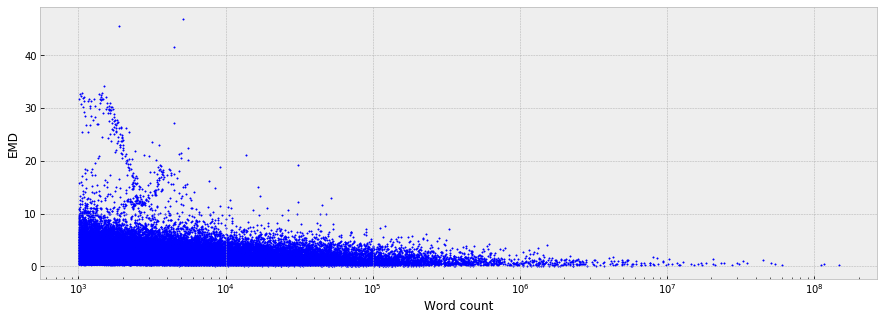

In [14]:
plt.figure(figsize=(15, 5))

plt.xlabel('Word count')
plt.ylabel('EMD')
plt.xscale('log')
plt.scatter(df['count'], df['emd'], s=2, c='b')

plt.show()

In [15]:
def knn_zscore(token, n=100):
    
    nn_idx = (
        (df['count'] - df.loc[token]['count'])
        .abs().sort_values().head(n).index
    )
    
    nn = df.loc[nn_idx]
    
    return (df.loc[token]['emd'] - nn['emd'].mean()) / nn['emd'].std()

In [16]:
knn_zscore('blue')

3.1989523292623927

In [17]:
df_knn = df.copy()

df_knn['knn_zscore'] = df.index.map(knn_zscore)

In [18]:
df_knn.sort_values('knn_zscore', ascending=False).head(500)

,count,emd,knn_zscore
end.,5147,46.831359,9.288292
etext,4492,41.516237,8.896659
288,1672,30.088041,8.872162
282,1560,30.160188,8.737396
301,1403,30.889966,8.676508
epilogue,1499,34.168223,8.569439
308,1268,31.732119,8.569354
294,1459,31.730463,8.564439
279,1656,29.637368,8.542040
299,1436,32.744207,8.504122


In [19]:
# https://matplotlib.org/devdocs/tutorials/colors/colormapnorms.html

class MidpointNormalize(mpl.colors.Normalize):
    
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

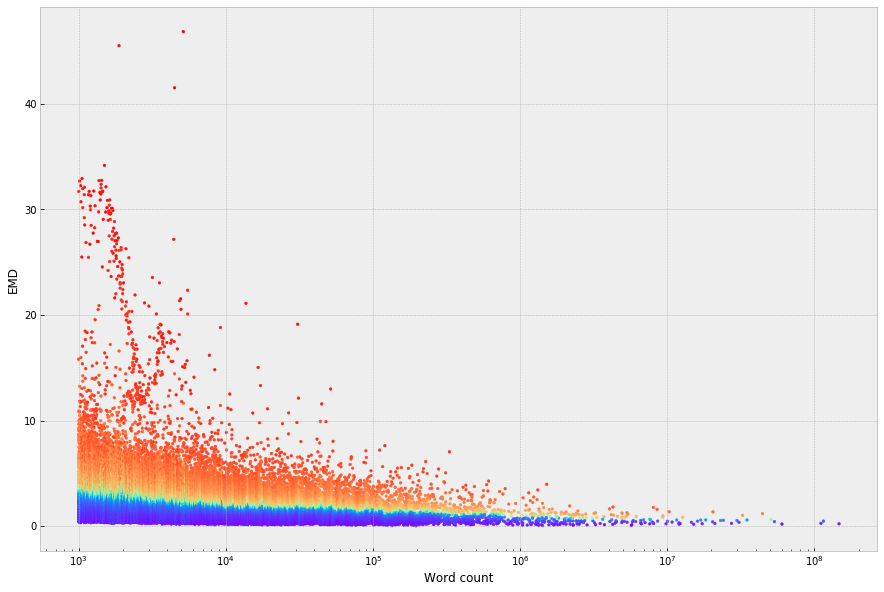

In [20]:
plt.figure(figsize=(15, 10))

plt.xlabel('Word count')
plt.ylabel('EMD')
plt.xscale('log')

norm = mpl.colors.SymLogNorm(
    vmin=df_knn['knn_zscore'].min(),
    vmax=df_knn['knn_zscore'].max(),
    linthresh=0.05,
)

plt.scatter(
    df_knn['count'], df_knn['emd'],
    s=7, c=df_knn['knn_zscore'],
    cmap='rainbow', norm=norm,
)

plt.show()